# **UMN LIGO/Multi-Messenger Astronomy Machine Learning Notebook**

In this notebook you will:

1. Explore a dataset of gamma-ray bursts (GRBs) from Fermi
2. Build features from light curves (flux vs. time) and spectrograms (flux as a fucntion of time and energy/frequency)
3. Train a neural network to classify GRBs as short or long based on their prompt emission properties

# Useful Background Information

## Astrophysics, Multi-messenger Astronomy, Gamma-ray Bursts, Machine Learning

* Multi-messenger Astornomy Wikipedia: https://en.wikipedia.org/wiki/Multi-messenger_astronomy
* Gamma-ray Bursts (GRBs) Wikipedia: https://en.wikipedia.org/wiki/Gamma-ray_burst 
* Machine learning Wikipedia: https://en.wikipedia.org/wiki/Machine_learning 
* Machine learning tutorial: https://www.geeksforgeeks.org/machine-learning/machine-learning/
* Machine learning and Python tutorial: https://www.w3schools.com/python/python_ml_getting_started.asp 

# Gamma-ray Bursts (GRBs)

Gamma-ray bursts (GRBs) are among the most powerful and energetic events observed in the universe. These brief but intense flashes of gamma radiation, lasting from milliseconds to several minutes, originate from distant galaxies and are thought to signal the collapse of massive stars or the merger of compact binary objects such as neutron stars or black holes. GRBs are broadly classified into two categories based on their duration: long GRBs (L-GRBs) and short GRBs (S-GRBs). The $T_{90}$ time is a crucial parameter in the classification of GRBs that quantifies the burst duration. It is defined as the duration during which 90\% of the burst's fluence (total energy) is accumulated. Specifically, the $T_{90}$ time is measured between the moments when 5\% and 95\% of the total fluence is detected. This parameter is instrumental in distinguishing between long and short GRBs. L-GRBs typically have a $T_{90}$ value greater than 2 seconds, indicating that they last longer and are usually associated with the collapse of massive stars into black holes, a process often linked to supernovae. In contrast, S-GRBs have a $T_{90}$ value less than 2 seconds and are thought to arise from the merger of compact objects, such as neutron stars or black holes. 

While the $T_{90}$ classification paradigm has been successful, it faces challenges with certain events that blur these boundaries. For instance, some long-duration GRBs like the kilonova events and some short GRBs associated with massive star collapses challenge the traditional classification scheme. Additionally, the rest-frame duration of GRBs can differ significantly from the observed duration due to cosmological redshift effects, further complicating classification efforts.

The *Fermi Gamma-ray Space Telescope*, launched in 2008, has revolutionized the study of GRBs. Equipped with the Gamma-ray Burst Monitor (GBM) and the Large Area Telescope (LAT), *Fermi* is capable of observing GRBs over a broad range of energies, from a few keV to several GeV. The GBM provides excellent time-resolution data in the form of light curves and spectrograms, enabling researchers to analyze the temporal and spectral properties of GRBs with unprecedented precision. However, the sheer volume of data collected by *Fermi* presents a significant challenge for manual classification of GRBs.

Understanding the distinction between L-GRBs and S-GRBs helps astrophysicists investigate the nature of stellar collapse, compact object mergers, and other high-energy astrophysical processes. It also plays a vital role in the identification of potential gravitational wave sources, particularly for S-GRBs, which are associated with the mergers of neutron stars — a leading source of gravitational waves. Moreover, precise GRB classification contributes to improving our models of cosmic structure formation and the evolution of galaxies, as the progenitors of these bursts are tied to the life cycle of stars and galaxies.

# Your Goal

Your goal is to train a model that can distinguish between long and short GRBs. Start with just the light curve data and then move to both light curve and spectrogram data. This model can demonstrate the potential of machine learning to efficiently categorize GRBs, enabling rapid characterization of their physical origins and contributing to the understanding of these energetic cosmic events.

Obviously a GRB can be classified by simply looking at the value for the $T_{90}$ time, but this project is attempting to classify these GRBs without $T_{90}$ and by only using light curve and spectrogram features.

# The Data: https://drive.google.com/drive/folders/1CPqBuNXDQRUUQ8syJglJkSHSYcl9_H-a?usp=sharing 

In this study, you will explore the use of *PubSmartWaterfalls* (https://github.com/nmik/PubSmartWaterfalls), a tool designed to generate spectrogram representations of light curves, to create a labeled dataset of GRBs for classification purposes. This project uses a dataset consisting of 1,963 GRB events. Each event includes light curve and spectrogram data, which serve as the primary features for training the classification model. The light curve data consists of time-resolved flux measurements for each GRB, used to track the intensity over time. For each GRB event, we utilized time bins and flux values to model the temporal behavior. The best practice would have the dataset be split into training and testing sets. The training set can contain 80% of the total data (1,570 GRB events), and the testing set can have the remaining 20% (393 events). 

The spectrograms represent the frequency-time distribution of the burst's radiation, providing insight into its spectral behavior. We processed each spectrogram as a 2D matrix of time and frequency, resized to ensure compatibility with the neural network architecture.

# Project Outline/Steps

1. Data Collection and Preprocessing

* Collect the data and begin preprocessing.

2. Feature Engineering and Model Setup

* Complete feature extraction and feature selection.

3. Model Training and Hyperparameter Tuning

* Model training and tuning the models.

4. Model Testing, Evaluation, and Finalization

* Evaluate and finalize the model.
* Integrate the final model and conduct testing.

# Data Files

The NumPy array files (`.npy` format) has precomputed spectrogram data (called waterfall plots) for individual Fermi GBM GRBs

* `GRB200524211.npy` corresponds to the GRB named **GRB 200524A**, detected on 2020-05-24.

* These `.npy` files hold 2D arrays, where each entry represents power or intensity as a function of time and frequency (spectrogram data).

The folder `image_arrays_231120_minval_5` seems to be a versioned collection (generated on 2023-11-20) of these waterfall plots, possibly applying a minimum signal value cutoff of 5 (based on the minval_5 part)

The `.npy` spectrograms are the **core input data** for training or testing classification models

Each `.npy` file is:

* A **spectrogram image in array form** ready to be processed by CNNs or other ML models

* Equivalent to an image, but stored in a way that's faster and easier to manipulate with NumPy and PyTorch/TensorFlow

## Spectrogram

In [ ]:
data_path = '/your/path/here/data/GRB180927993.npy'  # Replace with your file path

(12, 8, 9376)


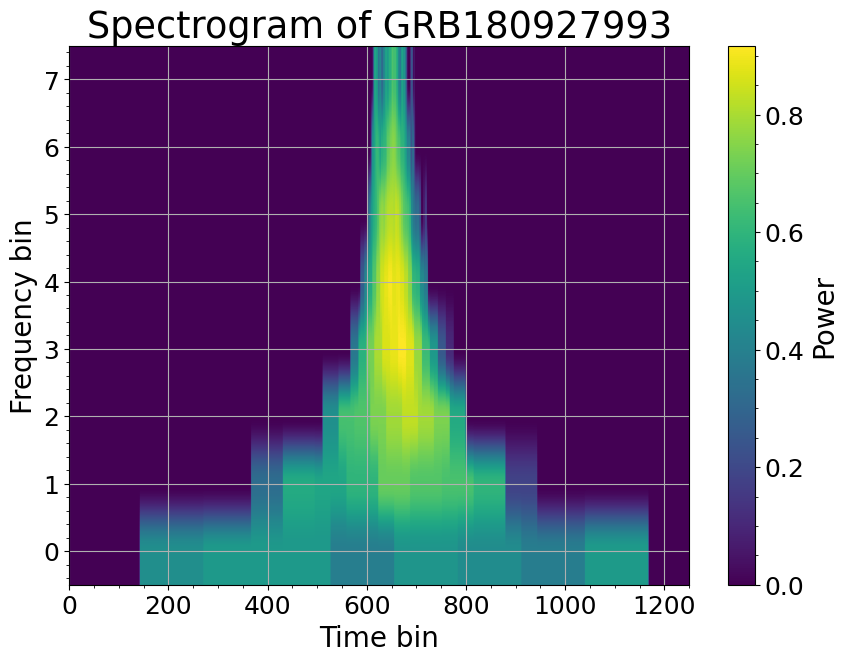

In [10]:
data = np.load(data_path)
#print(data.shape) 
# (12, 8, 9376)
# Time bins, frequency channels, detector/channel combinations
slice_2d = data[0]

plt.imshow(slice_2d, aspect='auto', origin='lower')
plt.title('Spectrogram of GRB180927993')
plt.colorbar(label='Power')
plt.xlabel('Time bin')
plt.ylabel('Frequency bin')
plt.xlim(0,1250)
plt.show()

This spectrogram shows the power spectral density of the gamma-ray burst over time and frequency

The x-axis is the time bin
* Represents the time evolution of the GRB
* Each bin corresponds to a specific time interval in the light curve
* The time bins could be seconds or other unit depending on how the unit was processed

The y-axis is the frequency bin
* Represents the different frequency channels (detector/channel combinations)
* Each frequency bin corresponds to a range of frequencies in the gamma-ray spectrum
* A higher bin number indicates a higher frequency range

The color is the power
* The intensity of the color at each (time, frequency) point shows the power or strength of the signal in that time and frequency range
* Brighter colors indicate higher power, darker colors indicate lower power
* Visualizes how the signal's intensity varies over time and frequency

## Light Curve

In [ ]:
file_path = '/your/path/here/data/glg_bcat_all_bn180927993_v00.fit'  # Replace with your file path

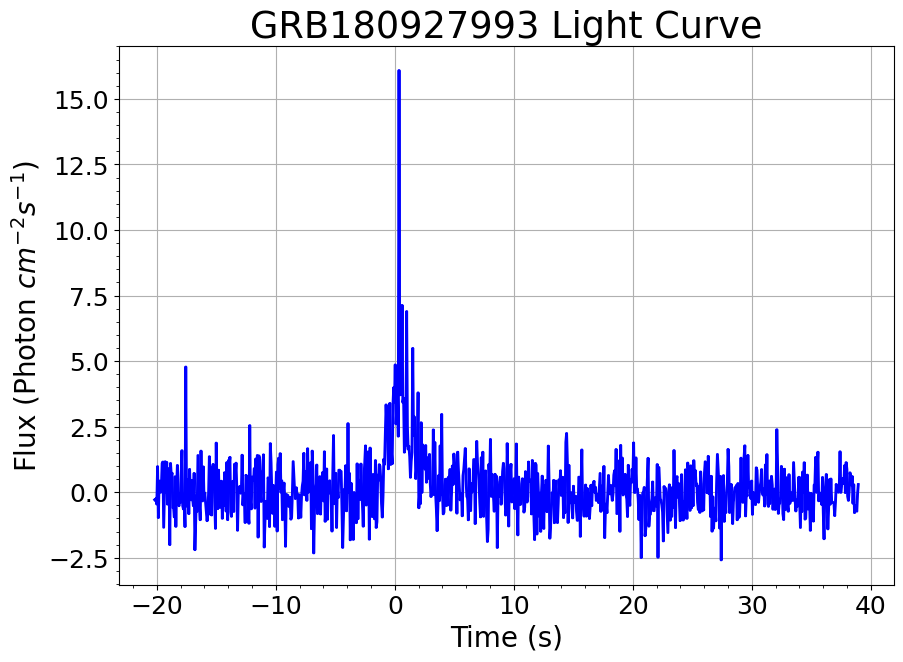

In [24]:
hdul = fits.open(file_path)

style = 'clean'  # Options: 'clean', 'raw', 'split'

# Extract time and flux from the FIT PARAMS HDU
time_bins = hdul[2].data['TIMEBIN']
flux = hdul[2].data['PHTFLUX']

flux1 = flux[:,0]
flux2 = flux[:,1]

if style == 'clean':
    plt.plot(time_bins, flux1, label='Light Curve', color='blue')
elif style == 'raw':
    plt.plot(time_bins, flux, label='Light Curve', color='blue')
elif style == 'split':
    plt.plot(time_bins, flux1, label='Light Curve', color='blue')
    plt.plot(time_bins, flux2, label='Light Curve', color='red')

plt.xlabel('Time (s)')  # Adjust units based on your data
plt.ylabel(r"Flux (Photon $cm^{-2} s^{-1}$)")
plt.title(f'GRB180927993 Light Curve')
plt.show()

## $T_{90}$

$T_{90}$ is the duration, in seconds, during which 90% of the burst fluence was accumulated. The start of the T90 interval is defined by the time at which 5% of the total fluence has been detected, and the end of the T90 interval is defined by the time at which 95% of the fluence been detected. The fluence for the T90 calculation is measured between duration_energy_low and duration_energy_high

In [ ]:
file_path = '/your/path/here/data/glg_bcat_all_bn180927993_v00.fit'  # Replace with your file path

In [26]:
hdul = fits.open(file_path)
header = hdul[0].header
t90 = header['T90']
print(f"T90: {t90} seconds")

T90: 4.608 seconds


# **YOUR WORK STARTS HERE**

## **Be sure to change all path names to your directories**

## In the lines, a "..." indicates a blank code that needs to be completed by you

# Feature Extraction

* *Feature extraction* is when raw data is transformed into a set of features (or attributes) that can be used as inputs for a machine learning model

    * These features are the most relevant aspects of the data that helps the model understand patterns, make predictions, or perform classification tasks

* For time series data (GRB light curves):

    * Statistical features: mean, variance, skewness, or peak value can give the model a sense of its overall trend or distribution

    * Temporal patterns: features like rise time, fall time, duration, and decay rate of the signal can be extracted

    * Fourier transform: converts the signal into frequency space and extract frequency-domain features (such as spectral power)

* For image data (spectrograms):

    * Edge Detection: Extracting edges (using filters like Sobel or Canny) can be an important feature for images.
    
    * Color Histograms: For images, the distribution of color intensities across the image can be used as a feature.
    
    * Convolutional Neural Networks (CNNs): Instead of manually designing features, CNNs can automatically learn relevant features (e.g., shapes, textures, and patterns) from images.

## First we'll get the features we need from a single GRB before we start applying to everything

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import astropy.io.fits as fits

file_path = '/your/path/here/data/glg_bcat_all_bn180927993_v00.fit'  # Replace with your file path
hdul = fits.open(file_path)

# Load light curve data (flux and time)
flux_data = ...  # Flux values (photon flux)
time_data = ...  # Time bins for light curve

# Feature extraction from light curve
peak_flux = np.max(flux_data)  # Peak flux
rise_time = time_data[np.argmax(flux_data)]  # Time of peak (rise time)
decay_time = time_data[-1] - time_data[np.argmax(flux_data)]  # Decay time
header = hdul[0].header
T90 = header['T90'] # $ The duration, in seconds, during which 90% of the burst fluence was accumulated

# Statistical features
mean_flux = np.mean(flux_data)
variance_flux = np.var(flux_data)
skewness_flux = stats.skew(flux_data)
kurtosis_flux = stats.kurtosis(flux_data)

# Print features
print(f"Peak Flux: {peak_flux}")
print(f"Rise Time: {rise_time}")
print(f"Decay Time: {decay_time}")
print(f"T90: {T90}")
print(f"Mean Flux: {mean_flux}")
print(f"Variance: {variance_flux}")
print(f"Skewness: {skewness_flux}")
print(f"Kurtosis: {kurtosis_flux}")

In [ ]:
path = '/your/path/here/data/GRB180927993.npy'

spectrogram_data = np.load(path)

spectrogram_data = data[0]

# Calculate features from the spectrogram
spectral_entropy = -np.sum(spectrogram_data * np.log(spectrogram_data + 1e-10))  # Add small value to avoid log(0)
spectral_flux = np.sum(np.diff(spectrogram_data))  # Change in power spectrum over time
peak_frequency = np.argmax(np.sum(spectrogram_data, axis=0))  # Maximum frequency across time bins
total_power = np.sum(spectrogram_data)  # Sum of all power values in the spectrogram

# Print features
print(f"Spectral Entropy: {spectral_entropy}")
print(f"Spectral Flux: {spectral_flux}")
print(f"Peak Frequency: {peak_frequency}")
print(f"Total Power: {total_power}")

Spectral Entropy: 826.9968697206543
Spectral Flux: -2.0816681711721685e-16
Peak Frequency: 657
Total Power: 1380.53154003665


# Model

Creating a Convolutional Neural Network (CNN) for GRB classification

1. **Data Preparation**

* Load and preprocess the data:

    * Light curves: extract relevant features (peak flux, rise time, decay time, etc.) or treat it as a time series and feed it directly to the CNN

    * Spectrograms: provides frequency vs. time representations

* Train-Validation-Test split:

    * Split the dataset into training, validation, and testing datasets (typically want 70-80% for the training, 10-15% for validation, and 10-15% for testing)

* Label encoding:

    * Need to encode the labels into numerical values (0 and 1 for binary classification) of short vs long GRB

2. **Model Architecture**

* Since using images (spectrograms), the model architecture will include convolutional layers to learn spatial features.

3. **Training the model**

* Once the model is defined, start training usign the training data and validating it using the validation

    * Epochs: the number of times the entire dataset is passed through the network

    * Batch size: the number of samples that will be processed together before the model's weights are updated

4. **Evaluate the model**

* After training, evaluate the performance of the model on the test set

5. **Model prediction**

* Once the model is trained, use it to make predictions on new data

6. **Model saving**

* Save the trained model for later use or deployment

7. **Evaluate and fine-tune**

* Metrics: Besides accuracy, monitor other metrics like precision, recall, F1-score, and ROC-AUC to evaluate the model’s performance in more detail

* Hyperparameter tuning: use techniques like GridSearchCV or RandomizedSearchCV to tune hyperparameters (e.g., learning rate, batch size, number of layers, etc.)

* Regularization: Use Dropout, L2 regularization, or other techniques to prevent overfitting, especially if the dataset is small.


**Summary:**
1. Data preparation: Prepare and preprocess light curves or spectrograms
2. CNN design: Define your CNN model with layers for convolution, pooling, and fully connected operations
3. Training: Train the model using training data and validate using validation data
4. Evaluation: Test the model’s performance on unseen data
5. Fine-tuning: Monitor performance metrics and tune the model if needed

# Preparing the Data

### Normalizing the Features

**Light Curve Data:** Ensures that the extracted features (flux, peak, rise time, decay time) are normalized so that the model doesn't give more important to any single feature due to varying magnitudes

**Spectrogram Data:** Normalizes the spectrograms to ensure the pixel values fall within the range [0,1] or [-1,1]

## Data Loading and Labeling

**Do this cell yourself**

By the end of this cell, you need:

1. A loop that goes through all GRB event folders in your `data/` 
2. Code that:
    * Reads the light curve and spectrogram for each event
    * Uses T90 to label each GRB as short/long
    * Cleans and normalizes the data
3. Final numpy arrays ready for training a neural network.

The rest of the notebook will expect the following variables to exist with the correct names and shapes (you could of course do any names you want and adjust them later on):

1. Directory and event list
    * `data_dir` - String path to the root data directory, e.g. "data" or "/path/to/data".
    * `events` - A sorted list of folder names, each starting with "GRB". Example contents: ["GRB130104721", "GRB130427324", ...]

2. Containers for raw data and labels. You must initialize these before the loop:
    * `X_light_curve` — list of 1D NumPy arrays. Each element: normalized light curve for one GRB.
    * `X_spectrogram` — list of 3D arrays (H, W, 1). Each element: normalized, resized spectrogram for one GRB.
    * `y` — list of integers. Each element: 0 for short GRB, 1 for long GRB.
    * Optional but useful (for logging/skips):
        * `n_missing` — int counter for events with missing files.
        * `n_bad_spec` — int counter for events with bad spectrograms.
3. Helper function. You should define a function to resize spectrograms:
    * `resize_spectrogram(spectrogram, new_size=(128, 128))`
        * Input: 2D array
        * Output: 2D array resized to (128, 128)
        * Uses `cv2.resize(...)`.
        * This function is used later inside your event loop.


4. Inside the event loop (per-GRB logic)
    * For each `event_folder` in `events`:
        * Build paths
            * `event_path = os.path.join(data_dir, event_folder)`
            * `event_id = event_folder` (e.g. "GRB130104721")
            * `trig_id = event_id[3:]` (e.g. "130104721")
            * `lc_fits_path = os.path.join(event_path, f"glg_bcat_all_bn{trig_id}_v00.fit")`
            * `spectrogram_path = os.path.join(event_path, f"{event_id}.npy")`
        * Skip if files missing
            * If either file doesn’t exist, increment `n_missing` and `continue`.
        * Read T90 and assign label
            * Open the FITS file: with `fits.open(lc_fits_path) as hdul:`
            * Get header: `header = hdul[0].header`
            * Get T90: `T90 = header.get("T90", None)`
            * Skip event if `T90` is `None`.
            * Label:
                * If `T90 < 2.0: label = 0` (short)
                * Else: `label = 1` (long)
        * Load light curve
            * Get columns:
            * If `np.max(flux) <= 0`, skip this event.
            * Normalize:
        * Load spectrogram
            * If `spec_raw.ndim == 1`, treat as bad: increment `n_bad_spec` and skip.
            * Resize: `spec_resized = resize_spectrogram(spec_2d, new_size=(128, 128))`
            * Normalize:
                * If `spec_max <= 0`, skip; otherwise `spec_norm = spec_resized / spec_max`
            * Add channel dimension:
        * Append to lists
            * `X_light_curve.append(flux_norm)`
            * `X_spectrogram.append(spec_norm[:, :, np.newaxis])`
            * `y.append(label)`

5. Padding and final arrays (used later in the model)
    * At the end of the loop, you must create:
        * `max_len` — integer
        * `X_lc_padded` — numpy array with shape (N, T, 1)
        * `X_spec` — NumPy array with shape (N, 128, 128, 1)
        * y — numpy array with shape (N,) of type int32

**These three are critical and are assumed by later cells:**
1. `X_lc_padded`
2. `X_spec`
3. `y`

If they’re missing or misnamed, the train/validation/test split and model code will break.

In [ ]:
import os
import numpy as np
from astropy.io import fits
from tensorflow.keras.preprocessing.sequence import pad_sequences
import cv2  # OpenCV for resizing

''' start here '''

# Train, Validation, and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# First split off a test set
X_lc_trainval, X_lc_test, X_spec_trainval, X_spec_test, y_trainval, y_test = ...

# Then split train vs validation
X_lc_train, X_lc_val, X_spec_train, X_spec_val, y_train, y_val = ...

print("Train:", X_lc_train.shape, X_spec_train.shape, y_train.shape)
print("Val:  ", X_lc_val.shape,   X_spec_val.shape,   y_val.shape)
print("Test: ", X_lc_test.shape,  X_spec_test.shape,  y_test.shape)

# Combined Light Curve and Spectrogram CNN

In [ ]:
from tensorflow.keras import layers, models

# --- Light curve branch (1D CNN) ---
lc_input = ...

x = layers.Conv1D(32, kernel_size=3, activation='relu')(lc_input)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
lc_features = ...

# --- Spectrogram branch (2D CNN) ---
spec_input = ...

y_spec = layers.Conv2D(32, (3, 3), activation='relu')(spec_input)
y_spec = layers.MaxPooling2D((2, 2))(y_spec)
y_spec = layers.Conv2D(64, (3, 3), activation='relu')(y_spec)
y_spec = layers.MaxPooling2D((2, 2))(y_spec)
y_spec = layers.Flatten()(y_spec)
y_spec = layers.Dense(64, activation='relu')(y_spec)
spec_features = ...

# --- Combine both branches ---
combined = layers.concatenate([lc_features, spec_features], name="combined_features")

z = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(1, activation='sigmoid', name="output")(z)  # binary: short vs long

model = models.Model(inputs=[lc_input, spec_input], outputs=output)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Training

In [ ]:
batch_size = 128
epochs = 50  # you can reduce this for quick runs

history = ...

# Evaluate on the held-out test set
test_loss, test_acc = model.evaluate(
    [X_lc_test, X_spec_test],
    y_test,
    verbose=2
)
print(f"Test accuracy: {test_acc:.3f}")

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Raw predictions and binary labels
y_prob = ...
y_pred = (y_prob > 0.5).astype(int).ravel()

# Confusion matrix
cm = ...

plt.figure(figsize=(6, 5))
sns.heatmap(...)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix (N={len(y_test)})")
plt.show()

# Normalized confusion matrix (row-normalized)
cm_norm = ...

plt.figure(figsize=(6, 5))
sns.heatmap(...)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Normalized Confusion Matrix")
plt.show()

print("Classification report:")
print(classification_report(y_test, y_pred, target_names=["Short GRB", "Long GRB"]))


# Accuracy and Loss Curves

In [ ]:
history_dict = history.history

epochs_range = range(1, len(history_dict["loss"]) + 1)

plt.figure(figsize=(12, 5))

''' complete the training and validation accuracy and loss plots below '''

...
plt.title("Training vs Validation Accuracy")

...
plt.title("Training vs Validation Loss")

# ROC and Precision-Recall

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

''' complete the ROC and Precision-Recall curves below '''

...
plt.title("ROC Curve")

...
plt.title("Precision–Recall Curve")